In [1]:
# Librairies basiques d'exploitation et visualization de données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import random # Pour pouvoir mélanger notre jeu de données

In [3]:
# Modules pour le pré-processing
from qualitative_prep import Qual_Standardize
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA as ACP
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.utils import shuffle

# Module pour l'exploration de la projection factorielle
from fanalysis.pca import PCA

# Modèle pour la modélisation
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor

# Module pour l'affichage
from sklearn import set_config
set_config(display="diagram")

# Librairie pour la lecture et enregistrement des modèles
import pickle

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("data_train.csv")

# Appartement

On sélectionne uniquement les appartements

In [6]:
appartement = df.loc[df["Type local"] == "Appartement"]
appartement.head(15)

,Valeur fonciere,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,exterieur,year,month,nom_region,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations,Normalized_Mutations
66,67000.0,Appartement,45.0,1,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
67,67000.0,Appartement,45.0,1,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
68,76200.0,Appartement,68.0,3,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
69,76200.0,Appartement,68.0,3,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
72,98000.0,Appartement,70.0,3,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
73,98000.0,Appartement,70.0,3,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
76,80500.0,Appartement,87.0,4,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
77,80500.0,Appartement,87.0,4,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
78,84500.0,Appartement,69.0,3,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
79,84500.0,Appartement,69.0,3,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454


On repère les duplicatas et on les enlèves.

In [7]:
appartement.duplicated().sum()/appartement.shape[0]
appartement = appartement.drop_duplicates()
appartement.shape

(390405, 17)

Nous allons ajouter pour améliorer la prédiction une estimation du prix du bien en utilisant le troisième quartile du prix au m2 du département et la surface du batiment. Nous utilisons le troisième quartile pour légèrement gonflé le prix de prédiction.

In [8]:
appartement["estimated"] = appartement["Surface reelle bati"] * appartement["q3_prixm2"]

In [9]:
appartement.drop(columns='Normalized_Mutations', inplace=True) # On enlève Normalized Mutations qui ne nous servira pas.

In [10]:
appartement.head()

,Valeur fonciere,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,exterieur,year,month,nom_region,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations,estimated
66,67000.0,Appartement,45.0,1,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,119423.617021
68,76200.0,Appartement,68.0,3,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,180462.354610
72,98000.0,Appartement,70.0,3,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,185770.070922
76,80500.0,Appartement,87.0,4,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,230885.659574
78,84500.0,Appartement,69.0,3,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,183116.212766


In [11]:
appartement.drop(columns=["month", "nom_region"], inplace=True) # Nous enlevons ensuite les mois et les noms des régions qui ne nous servent plus.

## Préparation de la pipeline pour le préprocessing.

In [12]:
# On déclare nos variables quantitatives
quant_columns = ['Surface reelle bati', 'Nombre pieces principales',
       'Surface terrain','pop_active',
       'salaire_moyen', 'nb_etab_elem', "mean_prixm2","q1_prixm2","q3_prixm2","Total_Mutations", "estimated"]

# On déclare nos variables quantitatives
cat_columns = [ 'exterieur']

In [13]:
# On crée une première pipeline qui va centrer et réduire nos variables quantitatives
numeric_transformer = Pipeline(
    steps=[
        ("scaler", StandardScaler())]
)


# On crée une seconde pipeline qui va créer un tableau disjonctif de notre variable qualitative puis la standardiser
categorical_transformer = Pipeline(
    steps=[("disjonctif", OneHotEncoder(handle_unknown="error")),
            ("standardize", Qual_Standardize())

    ]
)

# On crée un ColumnTransformer qui appliquera nos pipelines selon si elles sont qualitatives, quantitatives ou si c'est "Type local"
preprocessor = ColumnTransformer(
    transformers=[

        ("num", numeric_transformer, quant_columns),
        ("cat", categorical_transformer, cat_columns)
    ]
)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Surface reelle bati',
                                  'Nombre pieces principales',
                                  'Surface terrain', 'pop_active',
                                  'salaire_moyen', 'nb_etab_elem',
                                  'mean_prixm2', 'q1_prixm2', 'q3_prixm2',
                                  'Total_Mutations', 'estimated']),
                                ('cat',
                                 Pipeline(steps=[('disjonctif',
                                                  OneHotEncoder()),
                                                 ('standardize',
                                                  <qualitative_prep.Qual_Standardize object at 0x00000235FD0086D0>)]),
                                 ['exterieur'])])

In [14]:
# On convertit notre variable extérieur en booléen.
appartement["exterieur"] = appartement["exterieur"].astype(bool)

In [15]:
appartement.drop(columns=["Type local"], inplace=True)

Une fois nettoyé, nous pouvons séparer les variables exogènes de la variable endogène (valeur fonciere).

In [16]:
appartement_X = appartement.iloc[:,1:]
appartement_X.head()

,Surface reelle bati,Nombre pieces principales,Surface terrain,exterieur,year,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations,estimated
66,45.0,1,0.0,False,2018,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,119423.617021
68,68.0,3,0.0,False,2018,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,180462.354610
72,70.0,3,0.0,False,2018,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,185770.070922
76,87.0,4,0.0,False,2018,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,230885.659574
78,69.0,3,0.0,False,2018,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,183116.212766


In [17]:
appartement_y = appartement.iloc[:,0]
appartement_y.head()

66    67000.0
68    76200.0
72    98000.0
76    80500.0
78    84500.0
Name: Valeur fonciere, dtype: float64

Nous pouvons ensuite récupérer l'échantillon test et l'échantillon d'apprentissage.

In [18]:
# On divise notre jeu de données en un échantillon d'apprentissage et un test
a_X_train, a_X_test, a_y_train, a_y_test = train_test_split(appartement_X, appartement_y, test_size=0.33, random_state=1)

In [19]:
a_X_train.head()

,Surface reelle bati,Nombre pieces principales,Surface terrain,exterieur,year,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations,estimated
1499419,47.0,2,0.0,False,2019,847580.0,26.024599,369,6786.488293,5968.657000,7483.084000,24506,351704.948000
476286,55.0,1,0.0,False,2019,785650.0,16.008478,664,2302.792366,1614.083333,2742.625000,55058,150844.375000
1612520,74.0,5,0.0,False,2020,605955.0,17.028741,490,3356.235516,2994.517750,3645.516750,19522,269768.239500
123173,57.0,3,0.0,False,2020,137403.0,14.004948,204,1346.603848,1039.500000,1614.500000,5548,92026.500000
52716,67.0,4,0.0,False,2020,490900.0,16.371305,383,3366.643302,2009.954545,4508.419449,89481,302064.103059


In [20]:
a_X_train.shape

(261571, 13)

In [21]:
a_y_train.head()

1499419    437000.0
476286     280000.0
1612520    150000.0
123173      52000.0
52716      282000.0
Name: Valeur fonciere, dtype: float64

On applique notre pipeline pour appliquer notre preprocessing sur les données.

In [27]:
X_train_preprocessed = preprocessor.fit_transform(a_X_train, a_y_train)

In [28]:
# On récupère les noms de colonnes de notre tableau disjonctif de nos variables qualitatives
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['disjonctif'].get_feature_names_out(cat_columns)
cat_feature_names

array(['exterieur_False', 'exterieur_True'], dtype=object)

In [29]:
# On crée une liste avec toutes nos variables (dans l'ordre de la pipeline)
all_feature_names = np.concatenate([quant_columns, cat_feature_names])

In [30]:
# On transforme notre échantillon d'apprentissage
X_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)
X_train_preprocessed

,Surface reelle bati,Nombre pieces principales,Surface terrain,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations,estimated,exterieur_False,exterieur_True
0,-0.319919,-0.501105,-0.056463,1.138550,3.123541,-0.519216,2.819892,3.041175,2.645721,-0.335912,1.618026,1.003165,0.0
1,0.016637,-1.403189,-0.056463,0.903447,-0.166153,0.768709,-0.450957,-0.514186,-0.455402,0.897383,-0.299451,1.003165,0.0
2,0.815957,2.205146,-0.056463,0.221278,0.168942,0.009051,0.317528,0.612892,0.135254,-0.537102,0.835833,1.003165,0.0
3,0.100776,0.400979,-0.056463,-1.557467,-0.824192,-1.239580,-1.148496,-0.983313,-1.193401,-1.101192,-0.860944,1.003165,0.0
4,0.521471,1.303062,-0.056463,-0.215501,-0.046986,-0.458094,0.325120,-0.190970,0.699749,2.286939,1.144140,1.003165,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261566,0.479401,-0.501105,-0.056463,-1.102193,-0.844016,-0.104461,-0.913088,-0.853074,-0.953033,-0.508118,-0.490728,1.003165,0.0
261567,-1.245448,-1.403189,-0.056463,0.586068,0.771655,-0.641460,1.457486,1.244309,1.692256,-0.521318,-0.301404,1.003165,0.0
261568,-0.740614,-0.501105,-0.056463,-1.466805,-0.792476,-1.300702,-1.217895,-0.995550,-1.292070,-0.689124,-1.222469,1.003165,0.0
261569,-0.656475,-0.501105,-0.056463,0.604530,0.101982,0.995733,-0.208181,-0.223973,-0.179956,-0.321219,-0.561601,1.003165,0.0


In [31]:
# On transforme notre échantillon test en utilisant la pipeline ayant appris sur l'échantillon d'apprentissage
X_test_preprocessed = pd.DataFrame(preprocessor.transform(a_X_test), columns=all_feature_names)
X_test_preprocessed

,Surface reelle bati,Nombre pieces principales,Surface terrain,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations,estimated,exterieur_False,exterieur_True
0,3.213918,2.205146,-0.056463,-0.930143,-0.436200,-0.423167,-1.087740,-1.027004,-1.026599,-1.042296,0.598449,1.003165,0.0
1,-0.866822,-1.403189,-0.056463,-0.095338,-0.463059,-0.152485,-0.370530,-0.397400,-0.186033,0.561085,-0.715623,1.003165,0.0
2,0.016637,0.400979,-0.056463,0.903447,-0.166153,0.768709,-0.450957,-0.514186,-0.455402,0.897383,-0.299451,1.003165,0.0
3,4.013239,1.303062,-0.056463,0.356957,-0.845944,2.060999,-0.952068,-0.774706,-1.043880,-0.468882,0.899709,1.003165,0.0
4,-0.572336,-0.501105,-0.056463,0.590146,2.104200,0.415075,0.434697,0.461342,0.372452,-0.324650,-0.170691,1.003165,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128829,-0.404058,-0.501105,-0.056463,0.214585,0.001302,0.912781,-0.353280,-0.232765,-0.378900,-0.464724,-0.511033,1.003165,0.0
128830,-0.361988,-0.501105,-0.056463,-0.538262,-0.719350,0.201149,-0.808794,-0.670299,-0.838014,-0.594343,-0.791923,1.003165,0.0
128831,2.456667,1.303062,-0.056463,-1.019499,-0.756993,-0.497387,-0.750583,-0.796398,-0.880118,-0.445792,0.518755,1.003165,0.0
128832,-0.614405,-0.501105,-0.056463,0.069139,-0.392653,1.043757,-0.776742,-0.532945,-0.883523,0.024525,-0.942078,1.003165,0.0


# Application de notre AFDM (ACP sur nos données quantitatives standardisées et qualitatives one-hot encodées et standardisées)

In [32]:
# On instantie notre ACP
my_pca = PCA(std_unit=True, row_labels=X_train_preprocessed.index.values, col_labels=X_train_preprocessed.columns.values)
my_pca

PCA(col_labels=array(['Surface reelle bati', 'Nombre pieces principales',
       'Surface terrain', 'pop_active', 'salaire_moyen', 'nb_etab_elem',
       'mean_prixm2', 'q1_prixm2', 'q3_prixm2', 'Total_Mutations',
       'estimated', 'exterieur_False', 'exterieur_True'], dtype=object),
    row_labels=array([     0,      1,      2, ..., 261568, 261569, 261570], dtype=int64))

In [33]:
# On la fait apprendre sur notre échantillon d'apprentissage 
my_pca.fit(X_train_preprocessed.values)
print(my_pca.eig_)

[[4.41699976e+00 2.68508765e+00 2.26146827e+00 1.89872109e+00
  7.86685886e-01 3.79333218e-01 2.44967608e-01 1.89795188e-01
  6.32259883e-02 4.85994060e-02 2.37444276e-02 1.37151239e-03
  4.71355343e-22]
 [3.39769213e+01 2.06545204e+01 1.73959098e+01 1.46055468e+01
  6.05142989e+00 2.91794783e+00 1.88436622e+00 1.45996298e+00
  4.86353756e-01 3.73841585e-01 1.82649443e-01 1.05500953e-02
  3.62581033e-21]
 [3.39769213e+01 5.46314416e+01 7.20273514e+01 8.66328982e+01
  9.26843281e+01 9.56022759e+01 9.74866421e+01 9.89466051e+01
  9.94329589e+01 9.98068005e+01 9.99894499e+01 1.00000000e+02
  1.00000000e+02]]


In [34]:
eigenvalues = pd.DataFrame({'eigenvalue' : my_pca.eig_[0]}) # Création d'un DataFrame à partir des valeurs propres du modèle AFC.
eigenvalues = eigenvalues.reset_index() # Nous appliquons reset_index() pour récupérer les labels des dimensions pour le diagramme en barres.

# Conversion de la colonne "index" en type catégorie
eigenvalues["index"] = eigenvalues["index"].astype("category")

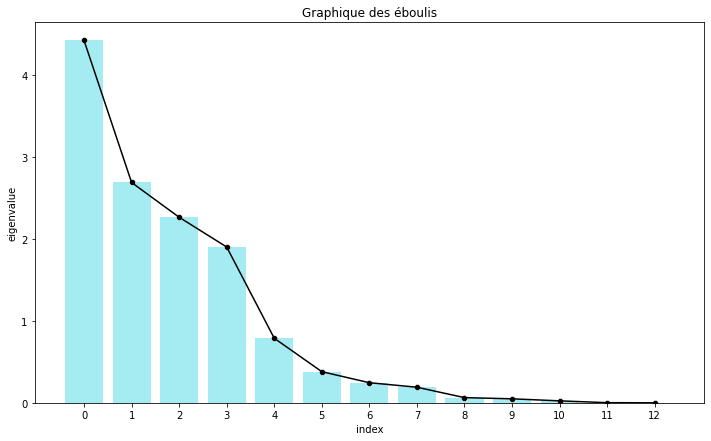

In [35]:
fig, axes = plt.subplots(figsize=(12, 7))
# Création d'un graphique à barres pour les valeurs propres.
sns.barplot(data=eigenvalues, x="index", y="eigenvalue", color="#98F5FF", ax=axes)
# Ajout d'un scatter plot pour les points des valeurs propres.
sns.scatterplot(data=eigenvalues, x="index", y="eigenvalue", color="black", ax=axes)
# Ajout d'une ligne pour connecter les points des valeurs propres.
sns.lineplot(data=eigenvalues, x="index", y="eigenvalue", color="black", ax=axes)
plt.title("Graphique des éboulis")
plt.show()

In [36]:
 # Création d'un DataFrame à partir des pourcentages d'inertie du modèle AFC.
pourcentage = pd.DataFrame({'pourcentage' : my_pca.eig_[1]})
pourcentage = pourcentage.reset_index() # Nous appliquons reset_index() pour récupérer les labels des dimensions pour le diagramme en barres.

pourcentage["index"] = pourcentage["index"].astype("category") # Conversion de la colonne "index" en type catégorie

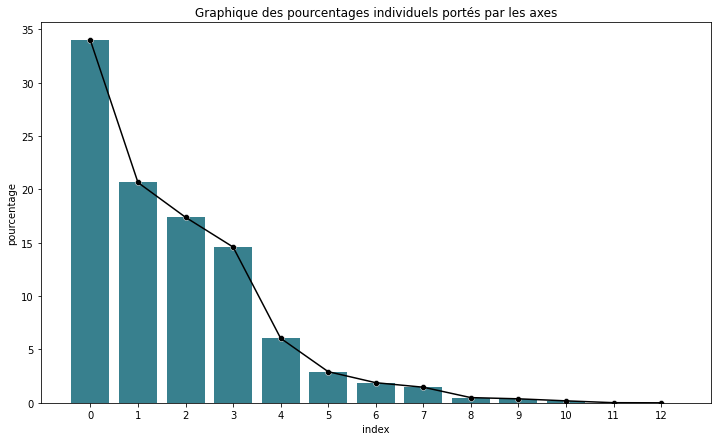

In [37]:
fig, axes = plt.subplots(figsize=(12, 7))
# Création d'un graphique à barres pour représenter les pourcentages.
sns.barplot(data=pourcentage, x="index", y="pourcentage", color="#2a8a9c", ax=axes)
# Création d'un graphique à barres pour représenter les pourcentages.
sns.scatterplot(data=pourcentage, x="index", y="pourcentage", color="black", ax=axes)
# Ajout d'une ligne pour connecter les points des pourcentages.
sns.lineplot(data=pourcentage, x="index", y="pourcentage", color="black", ax=axes)
# On obtient les valeurs minimales et maximales sur l'axe x.
xmin, xmax = axes.get_xlim() 
# On affiche une ligne horizontale qui représente le seuil de Kaiser.
plt.title("Graphique des pourcentages individuels portés par les axes")
plt.show()

In [38]:
cumsum = pd.DataFrame({'cumsum' : my_pca.eig_[2]}) # Création d'un DataFrame à partir des sommes cumulées d'inertie du modèle AFC.
cumsum = cumsum.reset_index() # Nous appliquons reset_index() pour récupérer les labels des dimensions pour le diagramme en barres.
# Conversion de la colonne "index" en type catégorie.
cumsum["index"] = cumsum["index"].astype("category")

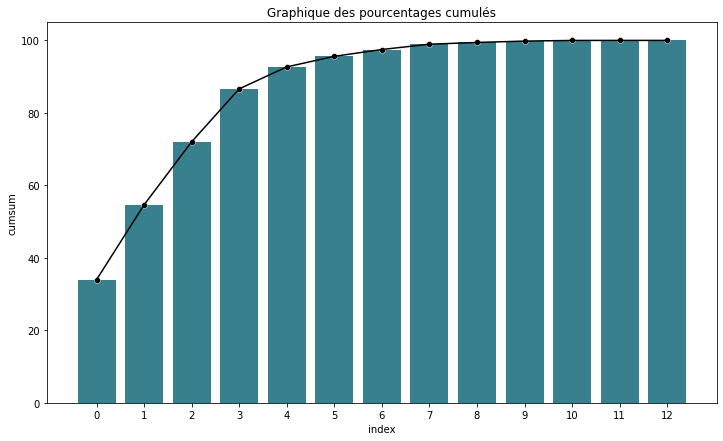

In [39]:
plt.figure(figsize=(12, 7))
# Création d'un graphique à barres pour représenter les pourcentages cumulés.
sns.barplot(data=cumsum, x="index", y="cumsum", color="#2a8a9c")
# Ajout d'un scatter plot pour les points des pourcentages cumulés.
sns.scatterplot(data=cumsum, x="index", y="cumsum", color="black")
# Ajout d'une ligne pour connecter les points des pourcentages cumulés.
sns.lineplot(data=cumsum, x="index", y="cumsum", color="black")
plt.title("Graphique des pourcentages cumulés")
plt.show()

Nous pouvons retrouver un coude à partir de la cinquième composante (index 4). C'est également à partir de celle là que nous pouvons observer que le pourcentage de variance expliquée commence à stagner. Nous allons retenir cinq composantes pour la réduction de dimensions.

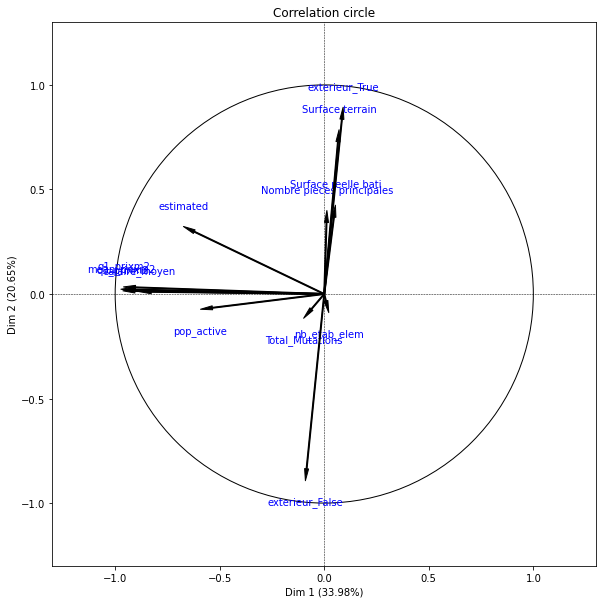

In [45]:
my_pca.correlation_circle(num_x_axis=1, num_y_axis=2, figsize=(20, 10))

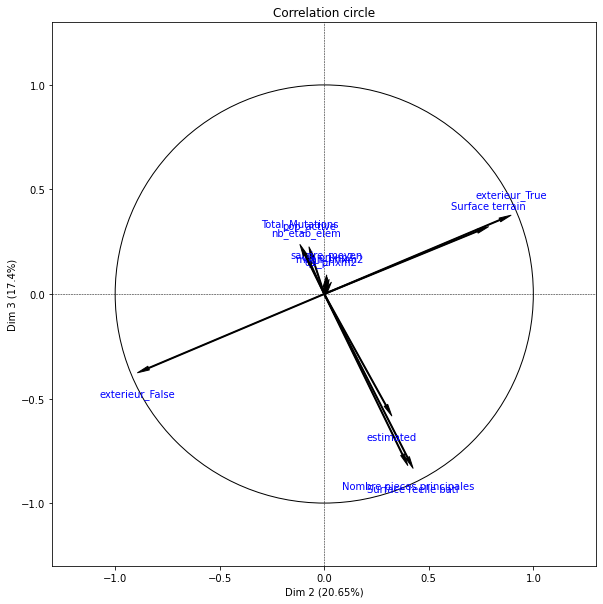

In [47]:
my_pca.correlation_circle(num_x_axis=2, num_y_axis=3, figsize=(20, 10))

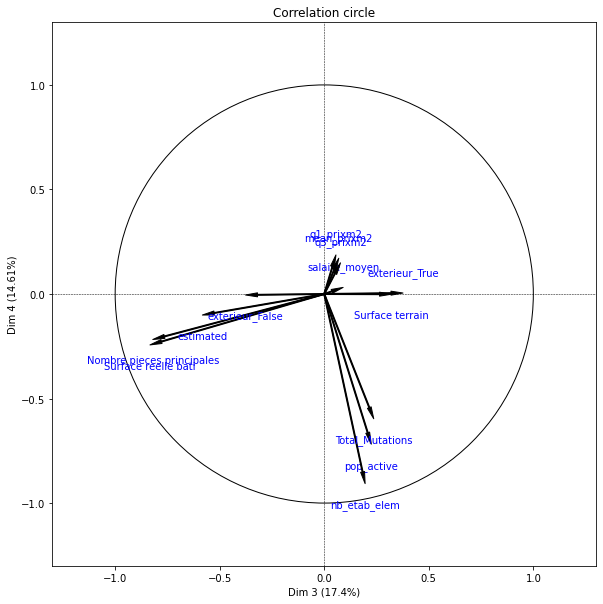

In [48]:
my_pca.correlation_circle(num_x_axis=3, num_y_axis=4, figsize=(20, 10))

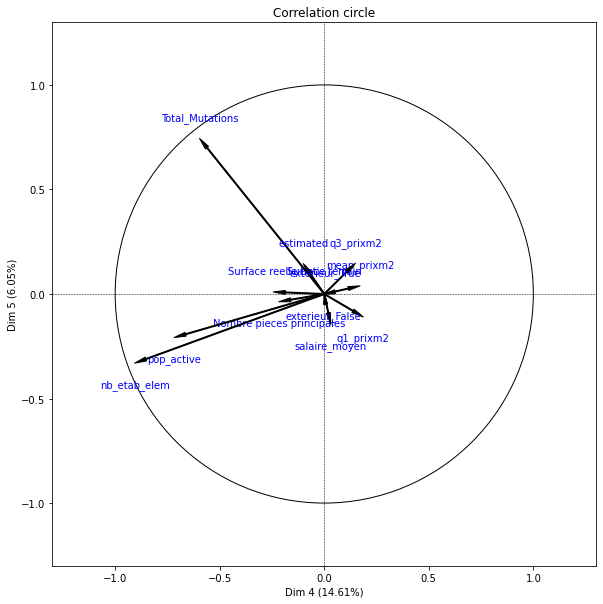

In [49]:
my_pca.correlation_circle(num_x_axis=4, num_y_axis=5, figsize=(20, 10))

In [40]:
# On extrait les valeurs en relation avec les variables
df_cols = my_pca.col_topandas()

In [41]:
# On extrait la contribution des variables à la définition des composantes
var_contrib = df_cols.iloc[:,13:18]
var_contrib

,col_contrib_dim1,col_contrib_dim2,col_contrib_dim3,col_contrib_dim4,col_contrib_dim5
Surface reelle bati,0.064773,6.718658,30.725299,3.125183,0.012239
Nombre pieces principales,0.003627,5.942720,29.738945,2.495280,0.176869
Surface terrain,0.113415,22.980978,4.579988,0.000055,0.007387
pop_active,7.931159,0.198443,2.239603,27.170772,5.519691
salaire_moyen,17.732238,0.004889,0.361225,0.052337,2.716040
nb_etab_elem,0.010587,0.295121,1.689651,43.321636,13.908378
mean_prixm2,21.415117,0.019615,0.213204,1.540066,0.193243
q1_prixm2,20.874344,0.042598,0.138293,1.839300,1.530374
q3_prixm2,20.993010,0.008662,0.267003,1.169739,2.762827
Total_Mutations,0.220496,0.502716,2.477240,18.750062,70.465349


In [42]:
# On extrait la qualité de représentation des variables sur les composantes
var_cos2 = df_cols.iloc[:,26:31]
var_cos2

,col_cos2_dim1,col_cos2_dim2,col_cos2_dim3,col_cos2_dim4,col_cos2_dim5
Surface reelle bati,0.002861,0.180402,0.694843,0.059339,9.628428e-05
Nombre pieces principales,0.000160,0.159567,0.672537,0.047378,1.391400e-03
Surface terrain,0.005010,0.617059,0.103575,0.000001,5.811065e-05
pop_active,0.350319,0.005328,0.050648,0.515897,4.342263e-02
salaire_moyen,0.783233,0.000131,0.008169,0.000994,2.136670e-02
nb_etab_elem,0.000468,0.007924,0.038211,0.822557,1.094153e-01
mean_prixm2,0.945906,0.000527,0.004822,0.029242,1.520216e-03
q1_prixm2,0.922020,0.001144,0.003127,0.034923,1.203923e-02
q3_prixm2,0.927261,0.000233,0.006038,0.022210,2.173477e-02
Total_Mutations,0.009739,0.013498,0.056022,0.356011,5.543410e-01


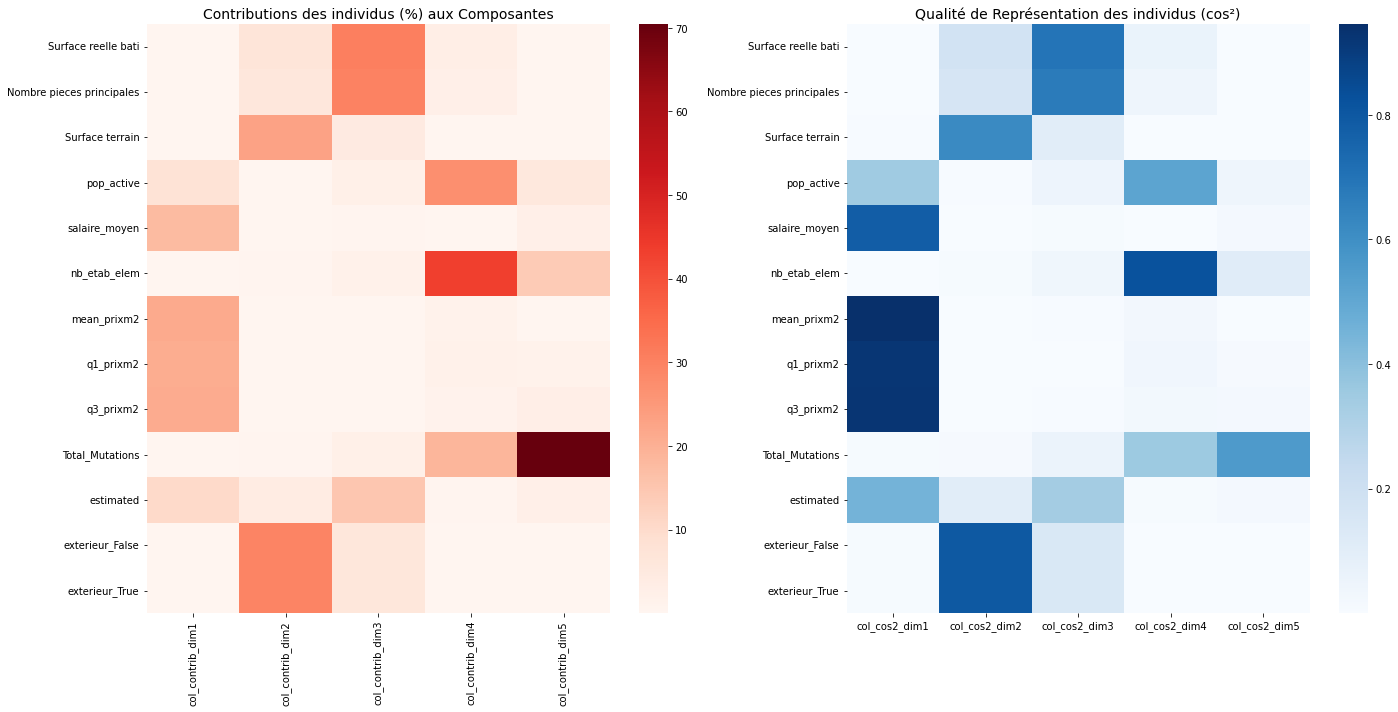

In [43]:
# On visualise les contributions et qualité de représentation grâce à des heatmaps.
fig = plt.figure(figsize=(20, 10))
spec = fig.add_gridspec(ncols=2, nrows=1)

ax0 = fig.add_subplot(spec[0, 0])
sns.heatmap(var_contrib, cmap="Reds", ax=ax0)
ax0.set_title("Contributions des individus (%) aux Composantes", fontsize=14)

ax1 = fig.add_subplot(spec[0, 1])
sns.heatmap(var_cos2, cmap="Blues", ax=ax1)
ax1.set_title("Qualité de Représentation des individus (cos²)", fontsize=14)


plt.tight_layout()
plt.show()

La première composante semble être reliée négativement au prix au m2 du bien et le salaire moyen horaire dans le département. Elle semble être liée **au niveau de pauvreté du département**. La seconde composante semble plutôt liée positivement **avec la présence d'un terrain** (liée positivement avec Surface_terrain et exterieur_True). La troisième composante semble plutôt liée négativement avec la grandeur du bien, elle semble représenter donc des **petits appartements**. La quatrième composante est liée négativement avec les caractéristiques démographiques, elle semble représenter les **petits départements**. Et enfin la cinquième composante, elle semble liée négativement avec le nombre de ventes: elle semble représenter les **départements peu attractifs**.  

In [50]:
df_rows = my_pca.row_topandas()
ind_coord = df_rows.iloc[:,0:6]
# Pour chaque facteur, on calcule la corrélation
for col in ind_coord.columns:
    coef = np.corrcoef(a_y_train, ind_coord[col])
    print(coef)

[[ 1.        -0.5062818]
 [-0.5062818  1.       ]]
[[1.         0.18869922]
 [0.18869922 1.        ]]
[[ 1.         -0.30444767]
 [-0.30444767  1.        ]]
[[ 1.         -0.13307866]
 [-0.13307866  1.        ]]
[[1.         0.09148926]
 [0.09148926 1.        ]]
[[ 1.00000000e+00 -6.70013189e-04]
 [-6.70013189e-04  1.00000000e+00]]


Nous pouvons observer que la valeur foncière semble principalement se corréler avec la première et la troisième composante:  **négativement avec le niveau de pauvreté**, c'est à dire qu'un département ayant un niveau de richesse plus élevé s'associe à des biens plus chers; **positivement avec les petits appartements**, cela pourrait peut-être faire référence aux petits appartements ayant des prixs élevés dans les grandes villes de France.

In [51]:
afdm = Pipeline(
    steps=[("preprocessor", preprocessor), ("factorial", ACP(n_components=5))]
)
afdm

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Surface reelle bati',
                                                   'Nombre pieces principales',
                                                   'Surface terrain',
                                                   'pop_active',
                                                   'salaire_moyen',
                                                   'nb_etab_elem',
                                                   'mean_prixm2', 'q1_prixm2',
                                                   'q3_prixm2',
                                                   'Total_Mutations',
                                                   'estimated']),
                                                 ('cat',
                                                  Pipeline(steps=[('disjonctif',
                                                                   OneHotEncoder()),
                                                                  ('standardize',
                                                                   <qualitative_prep.Qual_Standardize object at 0x00000235FD0086D0>)]),
                                                  ['exterieur'])])),
                ('factorial', PCA(n_components=5))])

In [52]:
# On fait apprendre notre pipeline sur notre échantillon d'apprentissage
a_X_train_afdm = pd.DataFrame(afdm.fit_transform(a_X_train))
a_X_train_afdm.head()

,0,1,2,3,4
0,6.075398,-0.283467,-1.025944,0.199154,-0.399926
1,-0.522940,-1.294082,1.309409,0.127906,0.259124
2,0.842627,2.137023,0.287514,-0.504182,-0.520452
3,-2.632241,0.646359,-1.669832,-0.294845,-0.245723
4,0.769362,1.219867,0.860134,-0.355188,2.441601


In [29]:
model_pkl_file = "appartement_preprocessing2.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(afdm, file)

In [53]:
# On remet l'index de y_train à 0 pour s'aligner avec notre X_train transformée.
a_y_train= a_y_train.reset_index().drop(columns=["index"])["Valeur fonciere"]

In [54]:
# On transforme notre échantillon test en utilisant les informations tirées de l'échantillon d'apprentissage
X_test_afdm = pd.DataFrame(afdm.transform(a_X_test))
X_test_afdm.head()

,0,1,2,3,4
0,-1.823373,3.957831,0.114219,-0.942216,-0.477753
1,-0.834396,-1.674978,-0.195842,0.207689,0.559583
2,-0.530648,-0.238611,1.587831,-0.098770,0.183169
3,-1.380871,3.424666,2.653075,-0.841680,-1.089437
4,1.581613,-0.961940,0.048178,0.159416,-0.902763


# On applique un modèle de régression avec descente de gradient stochastique

In [59]:
epoch = 10 # On établit combien de fois notre jeu de données passera entièrement par notre modèle de regression
batch_size =  2**8
num_samples = len(a_X_train_afdm) # On décrit la taille de l'échantillon d'apprentissage

In [63]:
mse_list = []

In [64]:
for eta in [1, 0.01, 0.001]:
    print(f'Eta0 en cours: {eta}')
    for alpha_val in [0.0001, 0.001, 0.01]:
        print(f'Alpha en cours: {alpha_val}')
        for l1_rat in [0, 0.25, 0.5, 0.75,1]:
            print(f'L1 en cours: {l1_rat}')
            sgd_regressor = SGDRegressor(loss='squared_error', penalty="elasticnet", alpha=alpha_val,learning_rate='optimal', eta0=eta, l1_ratio=l1_rat, shuffle=False)
            for k in range(1,epoch+1):
                    # On affiche la progression
                    progress = (k/epoch)*100  
                    print(f'Progression: Epoch {k}/{epoch} /  {progress}%')  

                    # On mélange notre jeu de données 
                    X_shuffled, y_shuffled = shuffle(a_X_train_afdm, a_y_train)

                    # Pour chaque mini-batch, fait apprendre ce groupe de données au modèle grâce au partial_fit
                    for i in range(0, num_samples, batch_size):                    
                        X_mini_batch = X_shuffled[i:i+batch_size]
                        y_mini_batch = y_shuffled[i:i+batch_size]

                        # Tant que la taille du batch n'est pas égal à zéro, on continue
                        if len(X_mini_batch) > 0:
                            sgd_regressor.partial_fit(X_mini_batch, y_mini_batch)
                        else:
                            break

                # On prédit les valeurs de y pour l'échantillon test
            y_pred = sgd_regressor.predict(X_test_afdm)
                    # On extrait la moyenne des résidus au carré
            mse = mean_squared_error(a_y_test, y_pred)
                    # On affiche le socre du modèle.
            mse_list.append(mse)
            print(f"Mean Squared Error: {mse}")

Eta0 en cours: 1
Alpha en cours: 0.0001
L1 en cours: 0
Progression: Epoch 1/10 /  10.0%
Progression: Epoch 2/10 /  20.0%
Progression: Epoch 3/10 /  30.0%
Progression: Epoch 4/10 /  40.0%
Progression: Epoch 5/10 /  50.0%
Progression: Epoch 6/10 /  60.0%
Progression: Epoch 7/10 /  70.0%
Progression: Epoch 8/10 /  80.0%
Progression: Epoch 9/10 /  90.0%
Progression: Epoch 10/10 /  100.0%
Mean Squared Error: 4481315215.65467
L1 en cours: 0.25
Progression: Epoch 1/10 /  10.0%
Progression: Epoch 2/10 /  20.0%
Progression: Epoch 3/10 /  30.0%
Progression: Epoch 4/10 /  40.0%
Progression: Epoch 5/10 /  50.0%
Progression: Epoch 6/10 /  60.0%
Progression: Epoch 7/10 /  70.0%
Progression: Epoch 8/10 /  80.0%
Progression: Epoch 9/10 /  90.0%
Progression: Epoch 10/10 /  100.0%
Mean Squared Error: 4459118439.91091
L1 en cours: 0.5
Progression: Epoch 1/10 /  10.0%
Progression: Epoch 2/10 /  20.0%
Progression: Epoch 3/10 /  30.0%
Progression: Epoch 4/10 /  40.0%
Progression: Epoch 5/10 /  50.0%
Progres

In [65]:
min(mse_list)

4372358086.56896

Nous récupérons donc les paramètres ayant donné cette valeur minimale de MSE.

In [66]:

sgd_regressor = SGDRegressor(loss='squared_error', penalty="elasticnet", alpha=0.01,learning_rate='optimal', eta0=1, l1_ratio=1, shuffle=False)
for k in range(1,epoch+1):
                    # On affiche la progression
                    progress = (k/epoch)*100  
                    print(f'Progression: Epoch {k}/{epoch} /  {progress}%')  

                    # On mélange notre jeu de données 
                    X_shuffled, y_shuffled = shuffle(a_X_train_afdm, a_y_train)

                    # Pour chaque mini-batch, fait apprendre ce groupe de données au modèle grâce au partial_fit
                    for i in range(0, num_samples, batch_size):                    
                        X_mini_batch = X_shuffled[i:i+batch_size]
                        y_mini_batch = y_shuffled[i:i+batch_size]

                        # Tant que la taille du batch n'est pas égal à zéro, on continue
                        if len(X_mini_batch) > 0:
                            sgd_regressor.partial_fit(X_mini_batch, y_mini_batch)
                        else:
                            break

# On prédit les valeurs de y pour l'échantillon test
y_pred = sgd_regressor.predict(X_test_afdm)
# On extrait la moyenne des résidus au carré
mse = mean_squared_error(a_y_test, y_pred)
# On affiche le socre du modèle.

print(f"Mean Squared Error: {mse}")

Progression: Epoch 1/10 /  10.0%
Progression: Epoch 2/10 /  20.0%
Progression: Epoch 3/10 /  30.0%
Progression: Epoch 4/10 /  40.0%
Progression: Epoch 5/10 /  50.0%
Progression: Epoch 6/10 /  60.0%
Progression: Epoch 7/10 /  70.0%
Progression: Epoch 8/10 /  80.0%
Progression: Epoch 9/10 /  90.0%
Progression: Epoch 10/10 /  100.0%
Mean Squared Error: 4372797437.526684


In [67]:
model_pkl_file = "appartement_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(sgd_regressor, file)

In [68]:
# On crée un dataframe avec nos valeurs prédites, observées et nos résidus.
df_graph = pd.DataFrame({'predicted':  y_pred,
              'observed': a_y_test,
              'residual': a_y_test - y_pred})

df_graph.head(30)

,predicted,observed,residual
1050300,198200.849889,127000.0,-71200.849889
496768,109790.797023,142000.0,32209.202977
488535,156843.799509,114000.0,-42843.799509
1044348,211739.557278,125000.0,-86739.557278
1256456,164237.555557,191600.0,27362.444443
1085901,77350.078955,60000.0,-17350.078955
513079,91274.217861,62000.0,-29274.217861
1060313,120888.320800,140290.0,19401.679200
398099,165135.112493,160000.0,-5135.112493
1339257,158404.575297,71000.0,-87404.575297


<Axes: xlabel='predicted', ylabel='observed'>

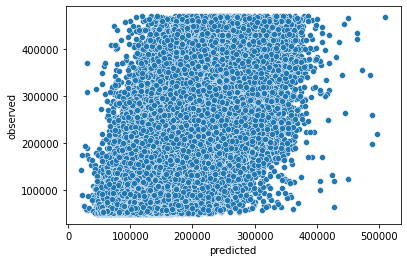

In [70]:
sns.scatterplot(data=df_graph, x="predicted", y="observed")

In [71]:
a_X_test[a_X_test.index == 1050300].iloc[0]

Surface reelle bati                131.0
Nombre pieces principales              5
Surface terrain                      0.0
exterieur                          False
year                                2018
pop_active                      302651.0
salaire_moyen                  15.186267
nb_etab_elem                         391
mean_prixm2                  1429.888427
q1_prixm2                     985.988125
q3_prixm2                       1869.478
Total_Mutations                     7007
estimated                     244901.618
Name: 1050300, dtype: object

On affiche les composantes ayant le plus d'importance dans la régression.

<Axes: xlabel='importance', ylabel='variables'>

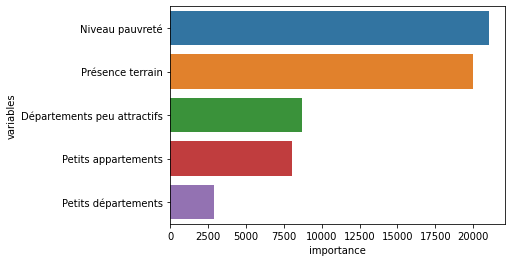

In [79]:

feat_import = pd.DataFrame({"importance": abs(sgd_regressor.coef_), "variables": ["Niveau pauvreté", "Présence terrain", "Petits appartements", "Petits départements", "Départements peu attractifs" ]}).sort_values(by="importance", ascending=False)

sns.barplot(data=feat_import,  x="importance",y="variables")

Ce sont principalement le niveau de pauvreté/richesse ainsi que la présence d'un terrain ou non qui sont déterminants dans la prédiction de la valeur foncière.